In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math

In [11]:
def generateRandomNumber(n,m,limit, nf=20):

    offset = (abs(n) + abs(m))/2
    x = np.random.rand(limit) + np.random.randint(n,m,limit)
    y = 0.3*x**2 + 2*x +np.random.randn(limit)*nf

    return x, y

In [13]:
reg = LinearRegression()
n,m = generateRandomNumber(-10,10,200, 5)

train_x, test_x, train_y, test_y = train_test_split(n,m, test_size=0.3)

reg.fit(train_x.reshape(-1,1), train_y.reshape(-1,1))

LinearRegression()

In [21]:
y_pred = reg.predict(train_x.reshape(-1,1))

In [22]:
def regSummary(y_true, y_pred):
    return{
        "r2_score": r2_score(y_true, y_pred),
        "mae": mean_absolute_error(y_true, y_pred),
        "mse": mean_squared_error(y_true, y_pred),
        "rmse": math.sqrt(mean_squared_error(y_true, y_pred))
    }

In [23]:
regSummary(train_y, y_pred)

{'r2_score': 0.5959125792647162,
 'mae': 7.263197476103615,
 'mse': 77.84488892003434,
 'rmse': 8.82297506060367}

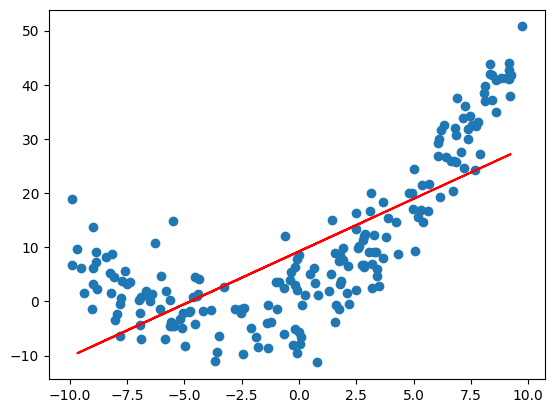

In [24]:
plt.scatter(n,m)
plt.plot(train_x, y_pred, color='red')

In [25]:
poly = PolynomialFeatures()

In [26]:
train_x1 = poly.fit_transform(train_x.reshape(-1,1))
test_x1 = poly.transform(test_x.reshape(-1,1))

In [27]:
reg.fit(train_x1,train_y)
y_pred = reg.predict(test_x1)
regSummary(test_y, y_pred)

{'r2_score': 0.8873742671023319,
 'mae': 4.123660929892209,
 'mse': 28.024817063210023,
 'rmse': 5.293847094808276}

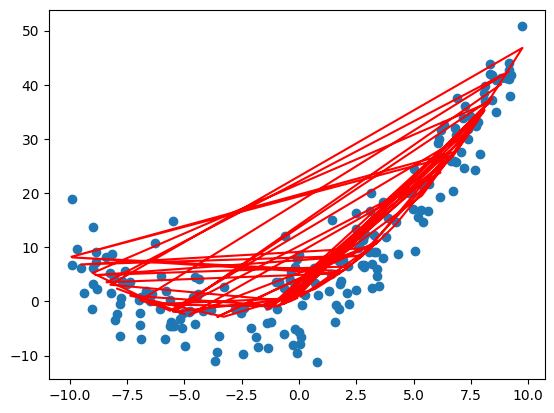

In [28]:
plt.scatter(n,m)
plt.plot(test_x, y_pred, color='red')

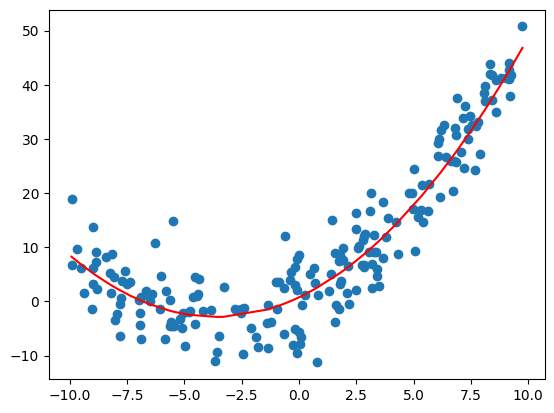

In [29]:
df = pd.DataFrame({"x":test_x, "y_pred":y_pred})
df = df.sort_values("x")
plt.scatter(n,m)
plt.plot(df["x"], df.y_pred, color='red')